## Project Introduction

This project focuses on data visualization and analysis of the *Best Selling Books 2023* dataset.
The objective is to explore patterns, trends, and relationships in book-related data such as author popularity, ratings, prices, genres, and publishing details.

Various visualization techniques such as histograms, bar charts, pie charts, scatter plots, line graphs, and correlation heatmaps are used to gain insights into reader preferences and market trends.
The findings from this project can help publishers, authors, and readers understand which factors influence book popularity and pricing.

**Loading Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("best sellin books 2023.csv", encoding="Latin1")

# Show first 5 rows
df.head()

,id,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre
0,#1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,145747,Hardcover,$18.88,NaN,320.0,16-10-2018,Self-Improvement
1,#2,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7 out of 5 stars,395512,Hardcover,$11.05,NaN,640.0,07-11-2023,Fiction & Action & Adventure
2,#3,Spare,Prince Harry The Duke of Sussex,4.5 out of 5 stars,116101,Hardcover,$11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs
3,#4,Fourth Wing,Rebecca Yarros,4.8 out of 5 stars,472618,Paperback,$13.62,NaN,544.0,17-09-2024,Fiction & Action & Adventure
4,#5,The Woman in Me,Britney Spears,4.4 out of 5 stars,51520,Hardcover,$11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               100 non-null    object 
 1   Book name        100 non-null    object 
 2   Author           100 non-null    object 
 3   Rating           100 non-null    object 
 4   reviews count    100 non-null    int64  
 5   form             100 non-null    object 
 6   price            100 non-null    object 
 7   Reading age      30 non-null     object 
 8   Print Length     98 non-null     float64
 9   Publishing date  100 non-null    object 
 10  Genre            100 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB


The dataset contains 100 rows and 11 columns. Some columns are categorical (Book name, Author, Genre) and some are numerical (reviews count, Print Length). Rating and price require cleaning.

**Clean Price Column**

In [3]:
df['price'] = df['price'].str.replace('[^0-9.]','', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

**Clean Rating Column**

In [4]:
df['Rating'] = df['Rating'].str.extract('([0-9.]+)')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

**Distribution of Book Ratings**

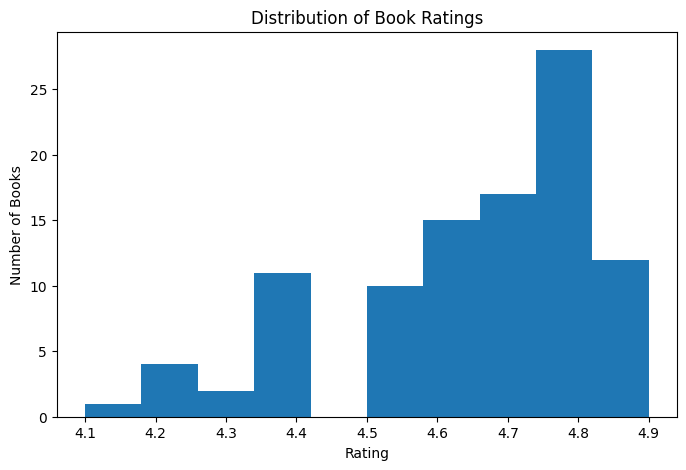

In [5]:
plt.figure(figsize=(8,5))
plt.hist(df['Rating'].dropna(), bins=10)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()

The histogram shows that most best-selling books have ratings between 4.6 and 4.9, with the highest frequency around 4.7–4.8. Very few books have ratings below 4.3. This indicates that the dataset mainly contains highly rated books, which suggests that high ratings are an important factor for books to become best sellers.

**Price Distribution Graph**

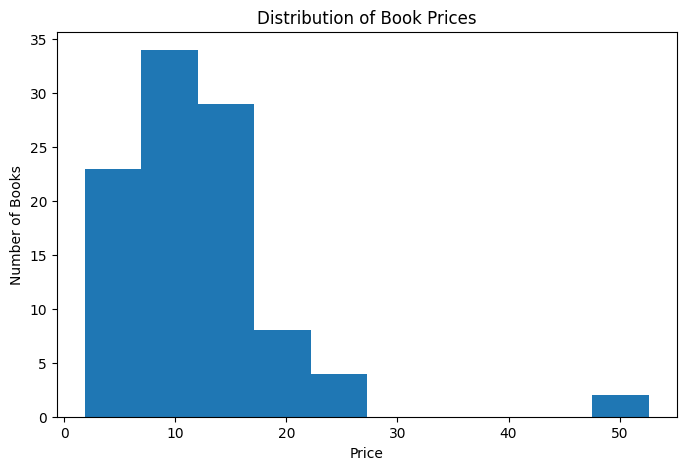

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df['price'].dropna(), bins=10)
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Number of Books")
plt.show()

The histogram shows that most best-selling books are priced between 5 and 20 units, with the highest number of books in the lower price range around 8 to 15. Very few books are priced above 30, and only a small number of expensive books (above 40) are present. This indicates that affordable pricing is common among best-selling books, while high-priced books are less frequent.

**Top Authors with Most Books**

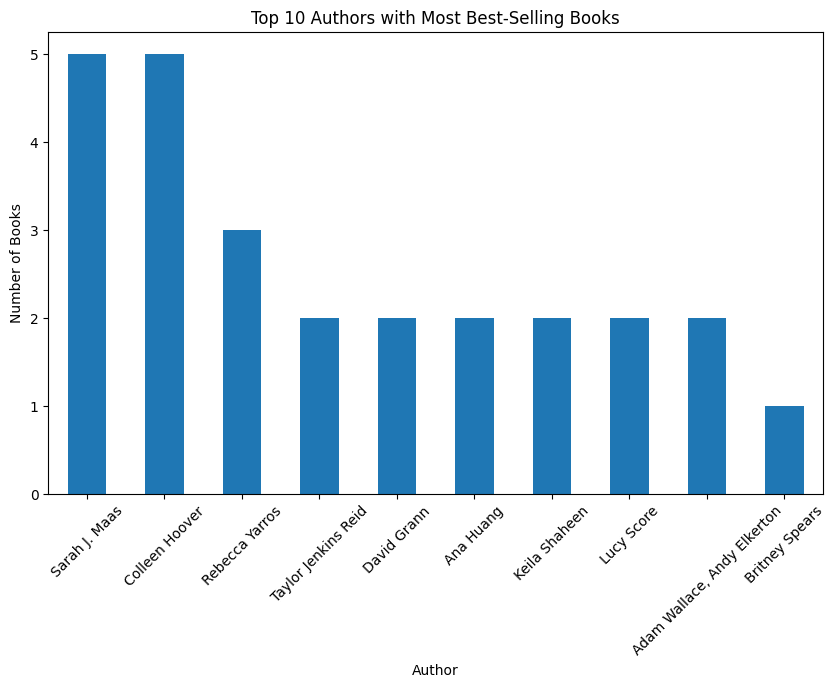

In [7]:
top_authors = df['Author'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_authors.plot(kind='bar')
plt.title("Top 10 Authors with Most Best-Selling Books")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.show()

**Genre Popularity**

In [8]:
genre_counts = df['Genre'].value_counts()
genre_counts

,count
Genre,
Fiction & Action & Adventure,33
Reading & Writing,18
Self-Improvement,8
Biographies & Memoirs,7
Mystery & Thriller & Suspense,6
Health & Fitness & Dieting,6
Business & Money,5
Politics & Social Sciences,4
Arts & Music & Photography,3


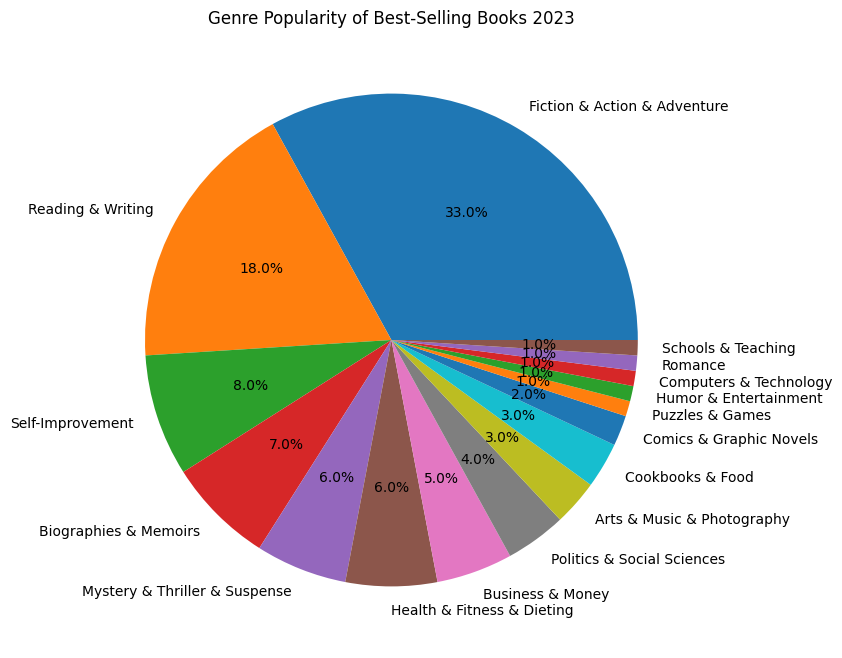

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title("Genre Popularity of Best-Selling Books 2023")
plt.show()

**Genre Popularity Analysis**

The pie chart shows the distribution of book genres among best-selling books. The most popular genre is ***Fiction,Action and Adventure*** followed by ***Reading & Writing*** and ***Self-Improvement***. Other genres contribute smaller proportions. This indicates that readers prefer certain genres, which dominate the best-seller list.

This visualization helps publishers and authors understand market demand and focus on high-performing genres.

**Price vs Rating Scatter Plot**

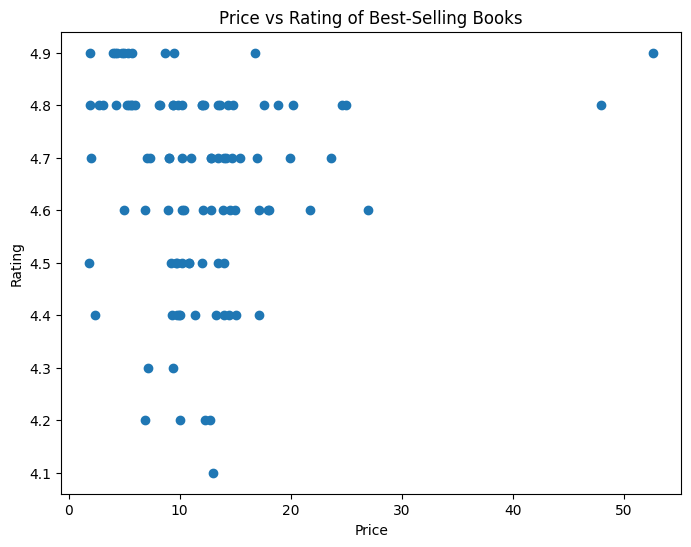

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['price'], df['Rating'])
plt.title("Price vs Rating of Best-Selling Books")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

**Price vs Rating Analysis**

The scatter plot illustrates the relationship between book prices and their ratings. The data points are scattered without a clear trend, indicating a weak correlation between price and rating. Most books have high ratings between 4.4 and 4.9 regardless of their price. This suggests that book ratings are independent of price and readers value content quality over cost.

**LINE GRAPH (Publishing Year Trend)**

Convert Publishing Date

In [11]:
df['Publishing date'] = pd.to_datetime(df['Publishing date'], errors='coerce')
df['Year'] = df['Publishing date'].dt.year

/tmp/ipython-input-852849183.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publishing date'] = pd.to_datetime(df['Publishing date'], errors='coerce')


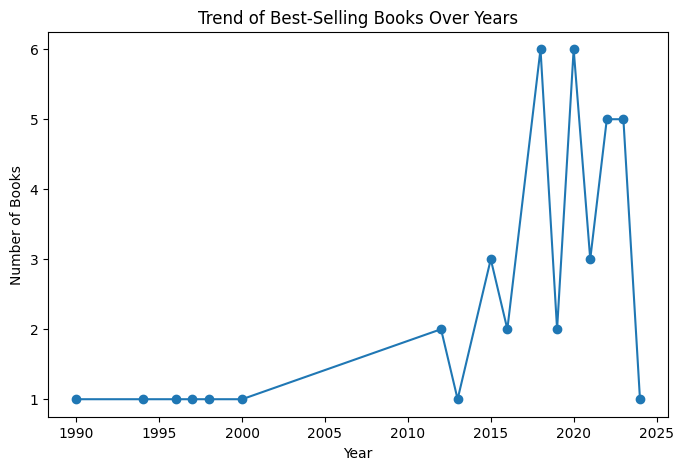

In [12]:
books_per_year = df['Year'].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(books_per_year.index, books_per_year.values, marker='o')
plt.title("Trend of Best-Selling Books Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.show()

The line graph shows the trend of best-selling books published over the years. The number of books varies across different years, indicating changes in publishing trends and reader demand. This visualization helps identify growth or decline in book popularity over time.

**HEATMAP (Correlation)**

In [13]:
numeric_df = df[['Rating', 'reviews count', 'price', 'Print Length']]
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

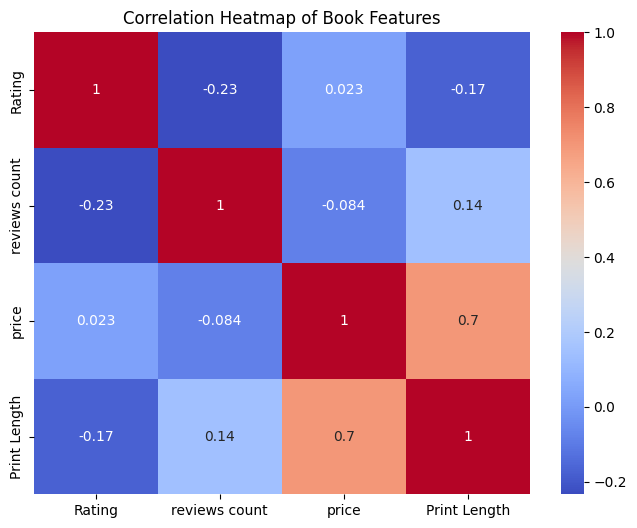

In [14]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Book Features")
plt.show()

**Correlation Heatmap Analysis**

The correlation heatmap illustrates the relationships among numerical variables such as rating, reviews count, price, and print length. The results show a strong positive correlation between price and print length (0.7), indicating that longer books tend to be more expensive. Ratings show a weak negative correlation with reviews count (-0.23) and print length (-0.17), suggesting that higher-rated books do not necessarily have more reviews or longer content. The relationship between rating and price is almost negligible (0.023), indicating that book price does not significantly influence ratings. Overall, most variables exhibit weak correlations, suggesting that multiple independent factors influence book popularity.

**MINI DASHBOARD (Multiple Graphs in One Output)**

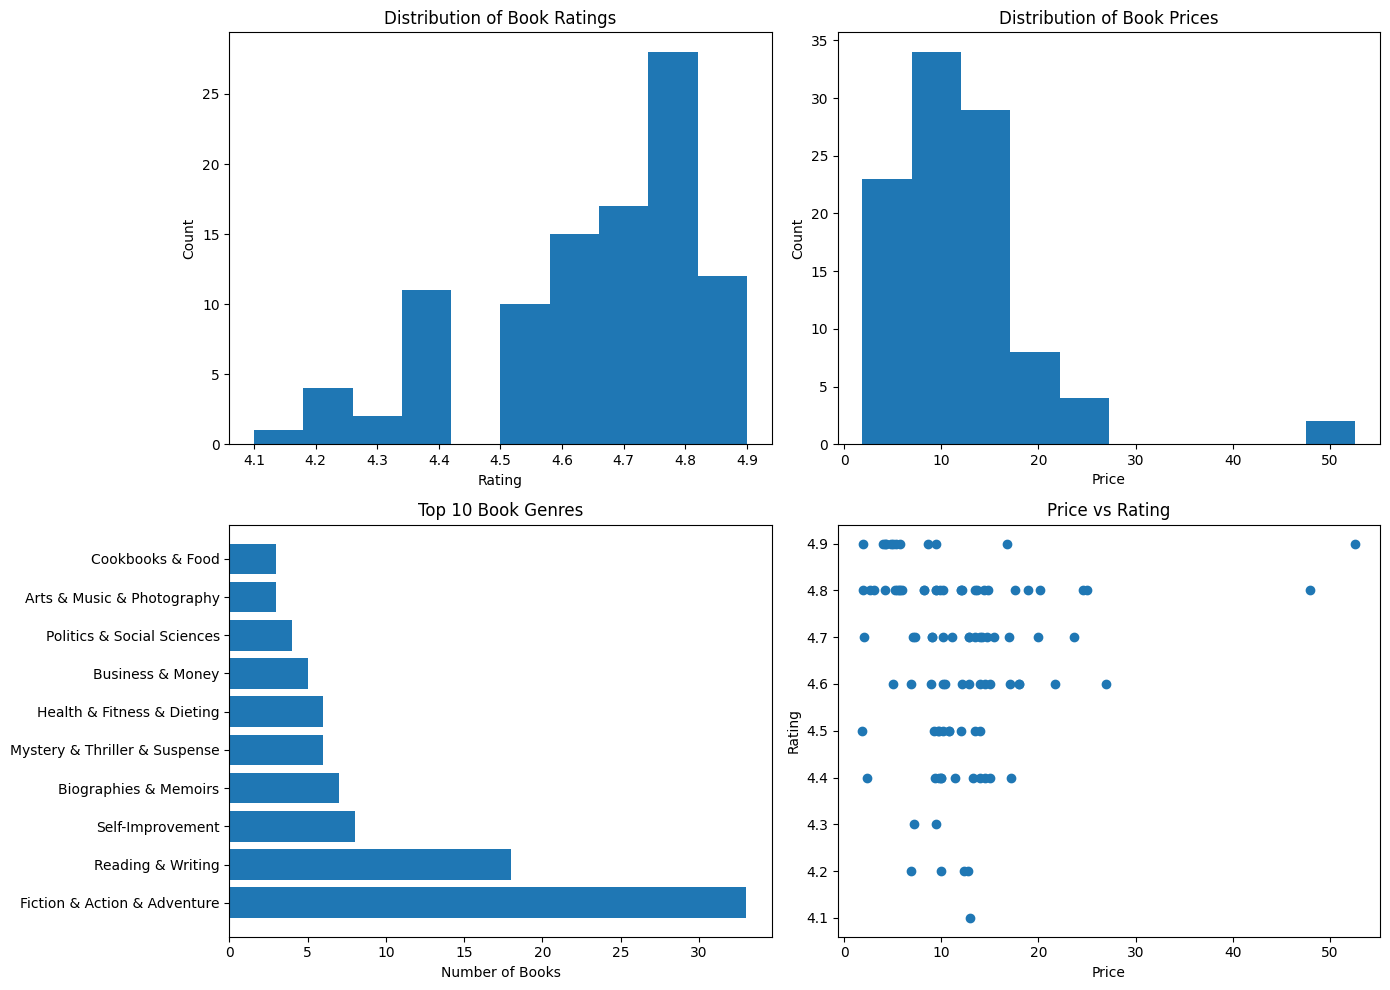

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 dashboard
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1. Rating Distribution
axes[0,0].hist(df['Rating'], bins=10)
axes[0,0].set_title("Distribution of Book Ratings")
axes[0,0].set_xlabel("Rating")
axes[0,0].set_ylabel("Count")

# 2. Price Distribution
axes[0,1].hist(df['price'], bins=10)
axes[0,1].set_title("Distribution of Book Prices")
axes[0,1].set_xlabel("Price")
axes[0,1].set_ylabel("Count")

# 3. Genre Popularity (Bar Chart)
genre_counts = df['Genre'].value_counts().head(10)
axes[1,0].barh(genre_counts.index, genre_counts.values)
axes[1,0].set_title("Top 10 Book Genres")
axes[1,0].set_xlabel("Number of Books")

# 4. Price vs Rating Scatter Plot
axes[1,1].scatter(df['price'], df['Rating'])
axes[1,1].set_title("Price vs Rating")
axes[1,1].set_xlabel("Price")
axes[1,1].set_ylabel("Rating")

plt.tight_layout()
plt.show()

## Data Story

The visualizations reveal that a few authors dominate the best-selling books list.
Most books receive high ratings, showing positive reader feedback.
Popular genres include Action and Self-Improvement.
Book prices vary widely, but higher prices do not guarantee higher ratings.
Longer books tend to be more expensive, as shown in the correlation analysis.

**Key Insights from Data Visualization**

1. Most best-selling books have
ratings between 4.4 and 4.9, indicating high customer satisfaction.

2. Book prices are mostly concentrated in the lower to mid range, suggesting readers prefer affordable books.

3. Certain genres dominate the best-seller list, showing reader preference toward specific categories.

4. There is no strong relationship between book price and rating, meaning expensive books are not always highly rated.

5. Print length has a moderate positive correlation with price, indicating longer books tend to cost more.

6. The number of best-selling books varies across years, showing changing publishing and reading trends.





**Conclusion**

In this task, various data visualization techniques were applied to analyze the Best Selling Books 2023 dataset. Visualizations such as histograms, bar charts, pie charts, scatter plots, line graphs, and heatmaps were created to explore patterns and relationships in the data. The analysis revealed that most best-selling books have high ratings, moderate pricing, and belong to a few popular genres. Price was found to have little influence on ratings, while print length showed a moderate relationship with price. These visual insights help understand reader preferences and market trends, supporting data-driven decision-making for publishers and authors.